<a href="https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ShallowNN/UniversalApproximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universal approximation theorem**

The purpose of this notebook is to investigate the universal approximation theorem.  We will define (by hand) networks that approximate a quadratic function, and show that the worst-case discrepancy between the original function and the approximation can be shrunk to below any desired level $\epsilon$ if we add enough hidden units.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions.

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar. If you are using CoLab, we recommend that turn off AI autocomplete (under cog icon in top-right corner), which will give you the answers and defeat the purpose of the exercise.

A fully working version of this notebook with the complete answers can be found [here](https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ShallowNN/UniversalApproximation_Answers.ipynb).

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library"
import matplotlib.pyplot as plt

First, let's define a neural network that creates a tent function with a specified height, position, and half-width

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(h_in):
  h_out = h_in.clip(0.0)
  return h_out

# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

  #  Compute the three initial inputs to the hidden unit
  # (lines figure 3.3 top row) from the theta parameters.
  h_in_1 = theta_10 + theta_11 * x
  h_in_2 = theta_20 + theta_21 * x
  h_in_3 = theta_30 + theta_31 * x

  # Pass these through the ReLU function to compute the hidden unit outputs as in
  # figure 3.3 (second row)
  h_out_1 = activation_fn(h_in_1)
  h_out_2 = activation_fn(h_in_2)
  h_out_3 = activation_fn(h_in_3)

  # Weight the activations using phi1, phi2 and phi3
  # to create the equivalent of figure 3.3 (third row)
  phi_h_out_1 = phi_1 * h_out_1
  phi_h_out_2 = phi_2 * h_out_2
  phi_h_out_3 = phi_3 * h_out_3

  # Combine the weighted hidden unit outputs and add
  # phi_0 to create the output as in figure 3.3 (bottom right)
  y = phi_0 + phi_h_out_1 + phi_h_out_2 + phi_h_out_3

  # Return everything we have calculated
  return y, h_in_1, h_in_2, h_in_3, \
            h_out_1, h_out_2, h_out_3, \
            phi_h_out_1, phi_h_out_2, phi_h_out_3

In [3]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,h_in_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,h_in_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,h_in_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,h_out_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,h_out_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,h_out_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,phi_h_out_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,phi_h_out_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,phi_h_out_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [40]:
def tent_function(x, position, height, half_width):
  # Choose parameters of neural network so that they create the desired tent function
  # They will be different depending on the sign of the height parameter, so we've
  # added an if statement to the skeleton code

  # The function starts and ends at zero, so the final offset term will be zero
  phi_0 = 0

  if(height>=0):
    # TO DO -- replace this code
    phi_1 = 0; theta_10 = 0; theta_11 = 0
    phi_2 = 0; theta_20 = 0; theta_21 = 0
    phi_3 = 0; theta_30 = 0; theta_31 = 0
  else:
    # TO DO -- replace this code
    phi_1 = 0; theta_10 = 0; theta_11 = 0
    phi_2 = 0; theta_20 = 0; theta_21 = 0
    phi_3 = 0; theta_30 = 0; theta_31 = 0


  y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3,= \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

  return y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3


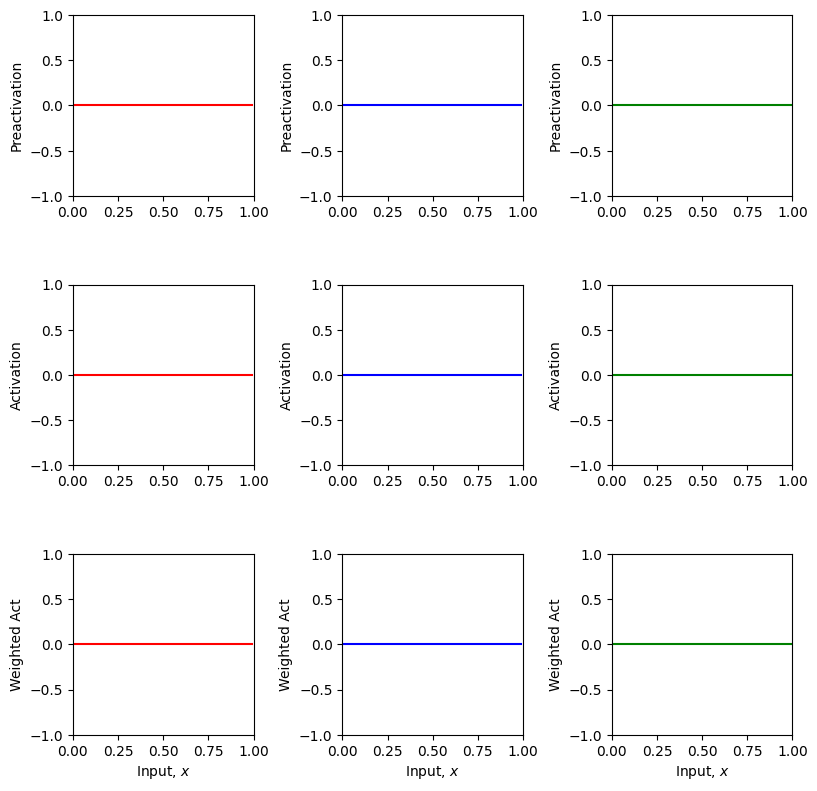

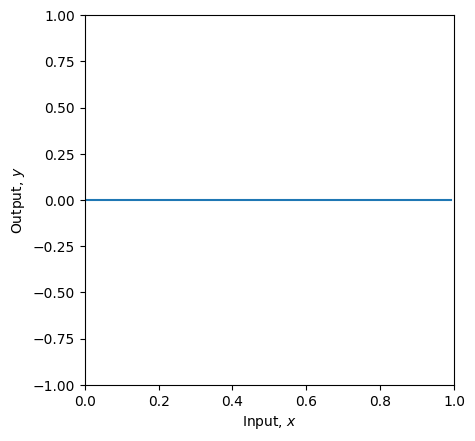

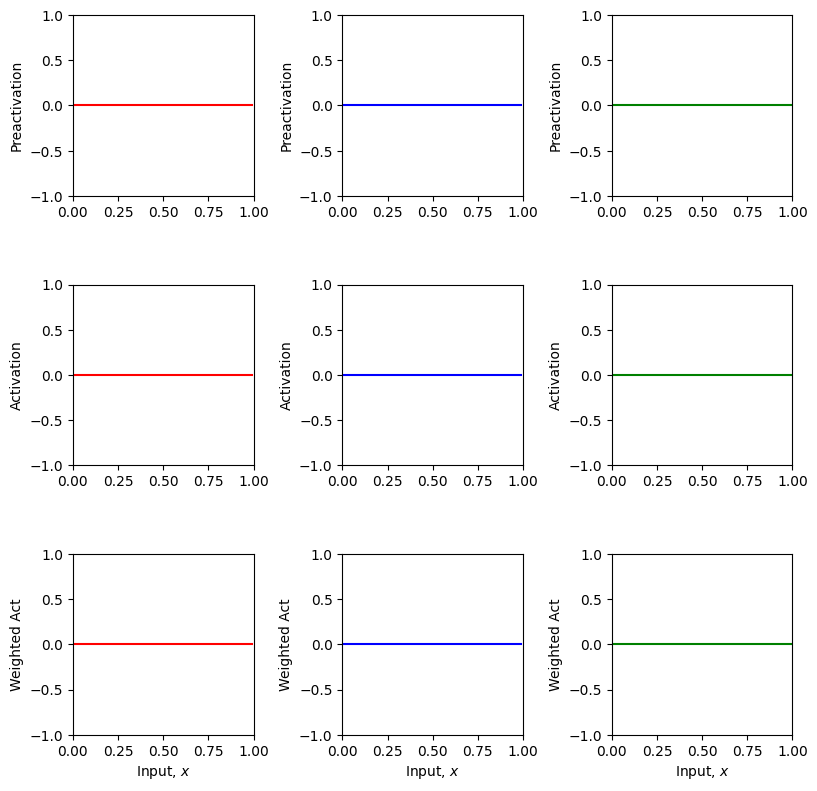

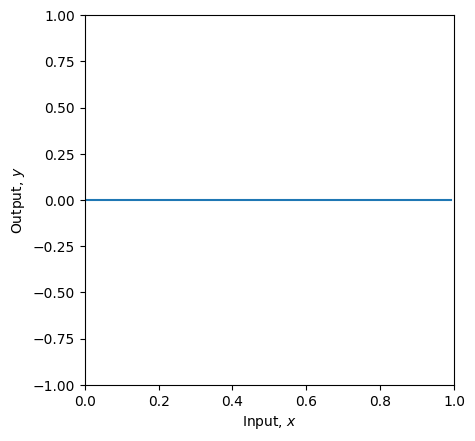

In [41]:
# Define a range of input values
x = np.arange(0,1,0.01)

# Get the tent function with a positive height
y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3 = tent_function(x, 0.5, 1, 0.25)

# And then plot it
plot_neural(x, y, h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=True)

# Get the tent function with a negative height
y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3 = tent_function(x, 0.5, -1, 0.25)

# And then plot it
plot_neural(x, y, h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=True)

Now let's define a function to approximate.  We'll choose a quadratic function because it's easy to find the worst case approximation error in closed form

In [42]:
def quadratic_function(x):
  return -6 * x**2 + 6 * x - 0.75

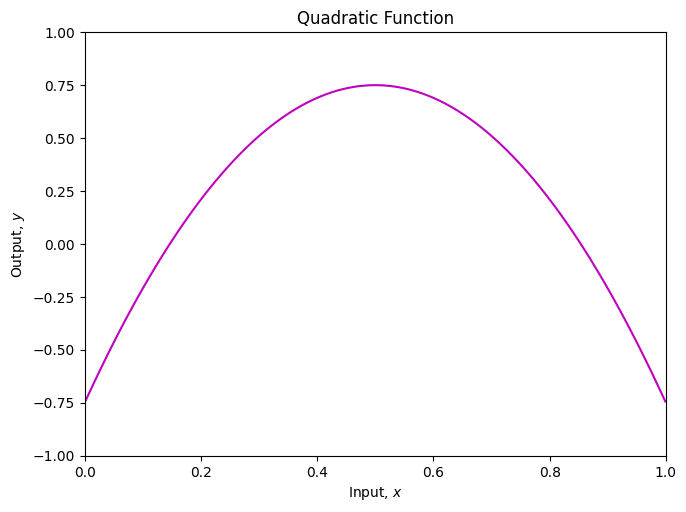

In [43]:
# Define a range of input values
x_quad = np.arange(0, 1, 0.001)
y_quad = quadratic_function(x_quad)

# Plot the quadratic function
fig, ax = plt.subplots()
fig.set_size_inches(7.5, 5.5)
ax.plot(x_quad, y_quad, 'm-')
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
ax.set_title('Quadratic Function')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
plt.show()

Now, we'll approximate this function by defining a piecewise linear interpolant with a certain number of segments in the region (0,1).  We acheive this by adding together tent functions.

In [44]:
def approximate_quadratic(x, quadratic_function, n_segments, min_x=0.0, max_x=1.0):

  # TODO - Write this function
  # Replace this code
  y = np.zeros_like(x);
  return y

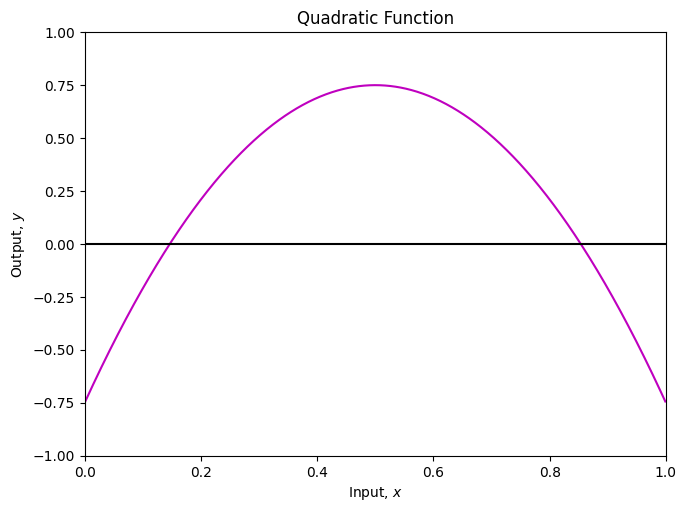

In [45]:
# Approximate with neural network
y_approx = approximate_quadratic(x_quad, quadratic_function, 5)

# Plot the quadratic function
fig, ax = plt.subplots()
fig.set_size_inches(7.5, 5.5)
ax.plot(x_quad, y_quad, 'm-')
ax.plot(x_quad, y_approx, 'k-')
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
ax.set_title('Quadratic Function')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
plt.show()

Let's now measure the worst case discrepancy in the approximation.  We can do this in closed form. For each segment, the difference between a quadratic curve and a straight line is another quadratic curve, and so we can find it's maximum position and evaluate the value there.

In [46]:
def get_max_error(start_point, end_point):
  # Find cofficients of line through these two points
  quadratic_start_val = quadratic_function(start_point)
  quadratic_end_val = quadratic_function(end_point)
  line_segment_slope = (quadratic_end_val - quadratic_start_val)/(end_point - start_point)
  line_segment_intercept = quadratic_start_val - line_segment_slope * start_point

  # Find quadratic that is difference of original quadratic and this line
  error_quadratic_squared_coeff  = -6 # Same as before
  error_quadratic_linear_coff = 6-line_segment_slope
  error_quadratic_contant = -0.75 - line_segment_intercept

  # Find max position on new quadratic by taking derivative, setting to zero and rearranging
  max_x = -error_quadratic_linear_coff / (2 * error_quadratic_squared_coeff)
  # Evaluate error at this point
  max_y = error_quadratic_squared_coeff * max_x**2 + error_quadratic_linear_coff * max_x + error_quadratic_contant

  return np.abs(max_y)

In [47]:
def find_max_error(n_segments, min_x=0.0, max_x=1.0):
  max_error = 0
  for c_segment in range(int(n_segments)):
    start_point = min_x + c_segment * (max_x - min_x) / n_segments
    end_point = min_x + (c_segment + 1) * (max_x - min_x) / n_segments
    max_error = np.maximum(max_error, get_max_error(start_point, end_point))
  print(f"N Segments = {n_segments}, WorstError = {max_error}")
  return max_error

In [48]:
error = find_max_error(1)
error = find_max_error(10)
error = find_max_error(100)
error = find_max_error(1000)
error = find_max_error(10000)
error = find_max_error(100000)
error = find_max_error(1000000)

N Segments = 1, WorstError = 1.5
N Segments = 10, WorstError = 0.015000000000000568
N Segments = 100, WorstError = 0.00015000000000231495
N Segments = 1000, WorstError = 1.500000002430113e-06
N Segments = 10000, WorstError = 1.5000003017462404e-08
N Segments = 100000, WorstError = 1.5000267694631475e-10
N Segments = 1000000, WorstError = 1.5027978861326119e-12
